In [31]:
# In order to learn, i decided to retake this past competition and try to improve my final score on it
# This notebook is about EDA in proper way
# here we link our notebook to our gdrive space
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [32]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
#from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline

In [33]:
train = pd.read_csv('/content/drive/MyDrive/Zindi/ai4d-lab-tanzania-tourism-classification-challenge/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Zindi/ai4d-lab-tanzania-tourism-classification-challenge/Test.csv')
variableDefinitions = pd.read_csv('/content/drive/MyDrive/Zindi/ai4d-lab-tanzania-tourism-classification-challenge/VariableDefinitions.csv')
sampleSubmission = pd.read_csv('/content/drive/MyDrive/Zindi/ai4d-lab-tanzania-tourism-classification-challenge/SampleSubmission.csv')

In [ ]:
train.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

In [ ]:
# Univariate analysis
# numerical features
'''
insights:
- it seems some outliers with all numerical features... (the max value is too large for the mean)
'''
train.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,18504.000000,18500.000000,18506.000000,18506.000000
mean,0.936230,0.998757,9.141576,2.493516
std,1.215582,1.173177,14.127449,5.275156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,6.000000,0.000000
75%,1.000000,1.000000,11.000000,4.000000
max,49.000000,58.000000,365.000000,240.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

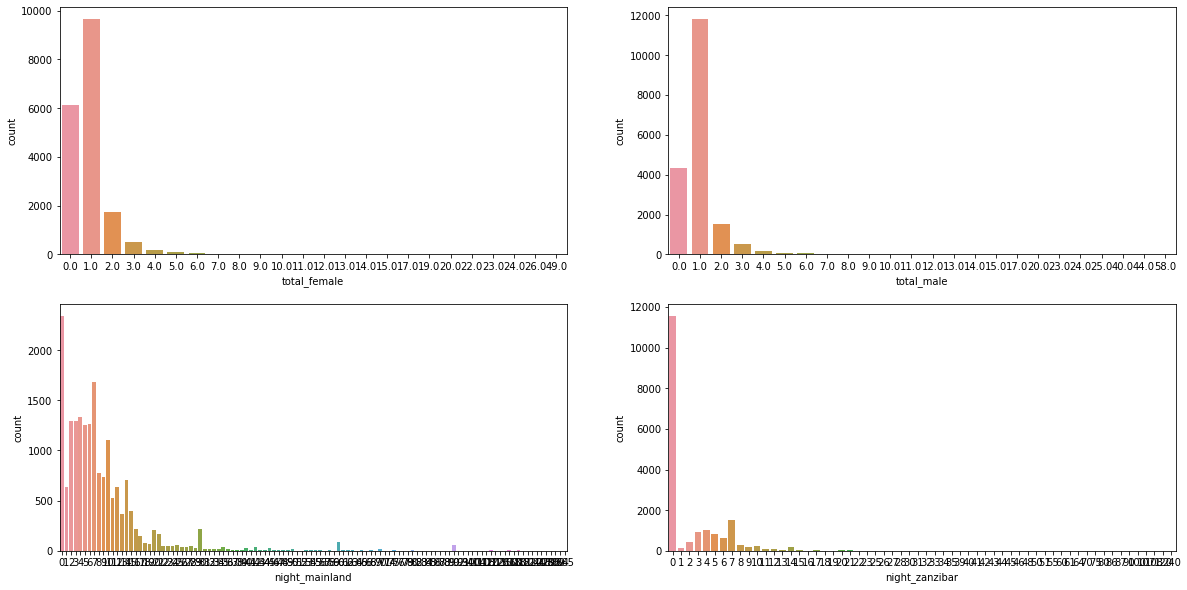

In [ ]:
f,ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot('total_female',data=train,ax=ax[0,0])
sns.countplot('total_male',data=train,ax=ax[0,1])
sns.countplot("night_mainland",data=train,ax=ax[1,0])
sns.countplot("night_zanzibar",data=train,ax=ax[1,1])
plt.show()

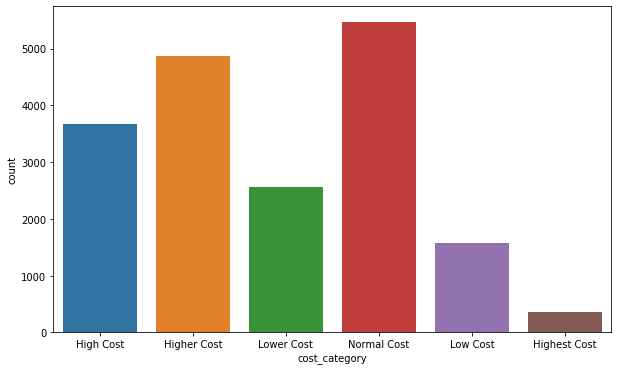

In [ ]:
# plot the target distribution
plt.figure(figsize=(10, 6))
sns.countplot(x = 'cost_category', data = train)

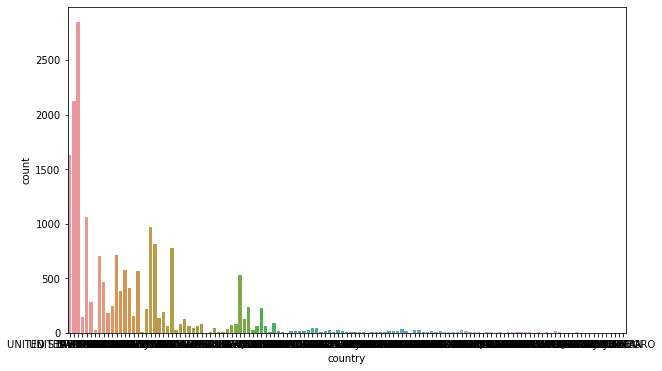

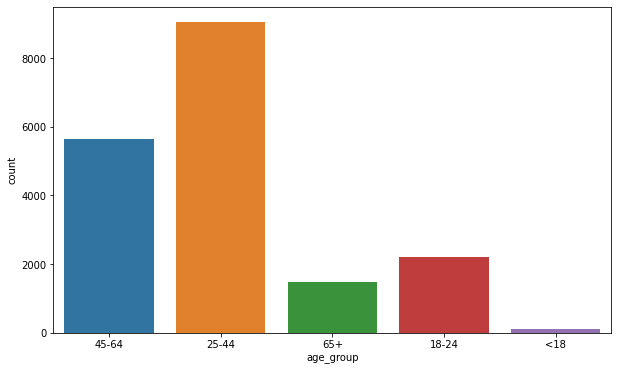

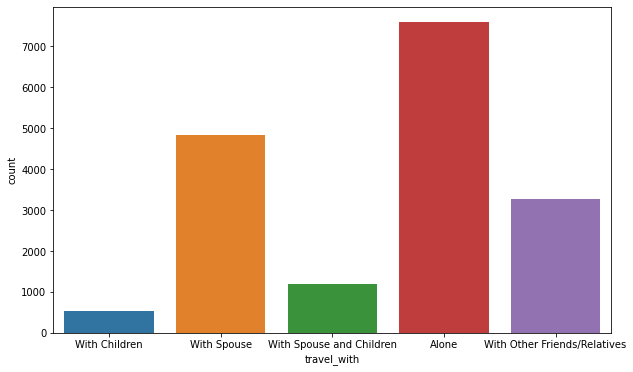

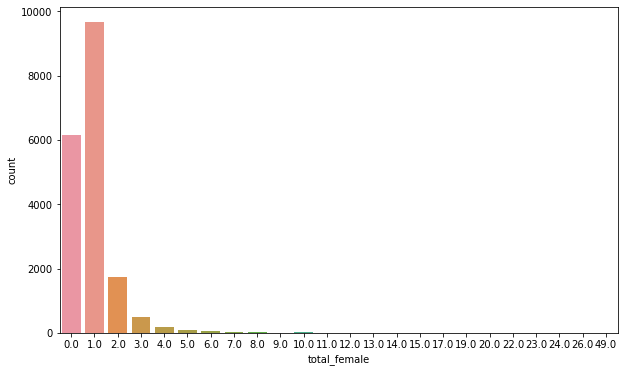

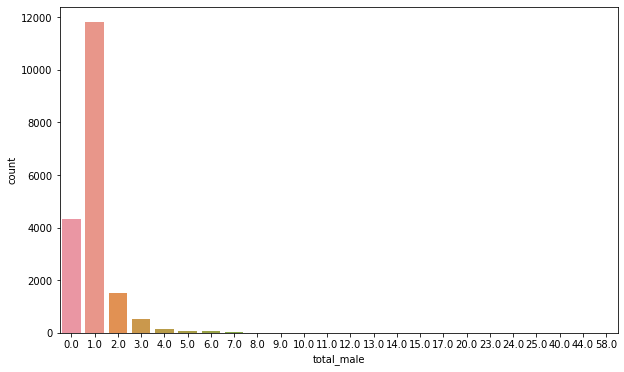

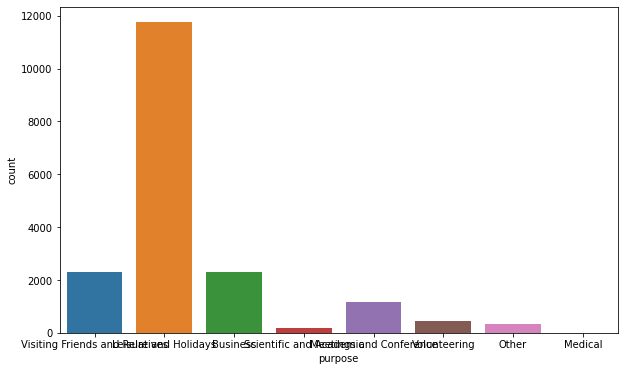

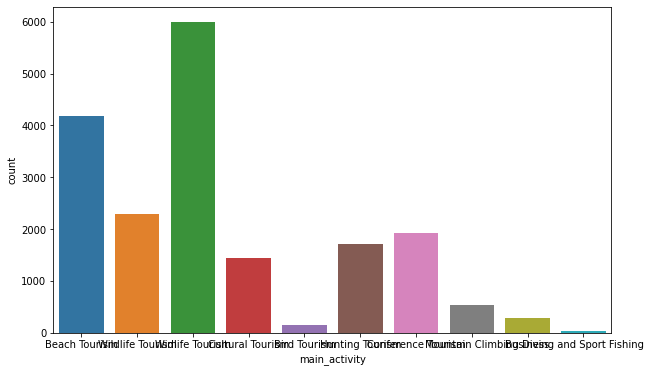

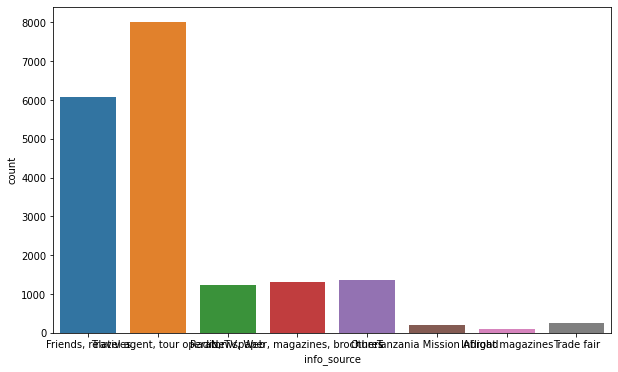

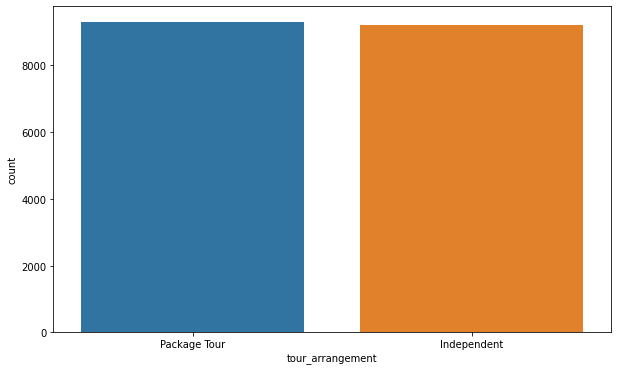

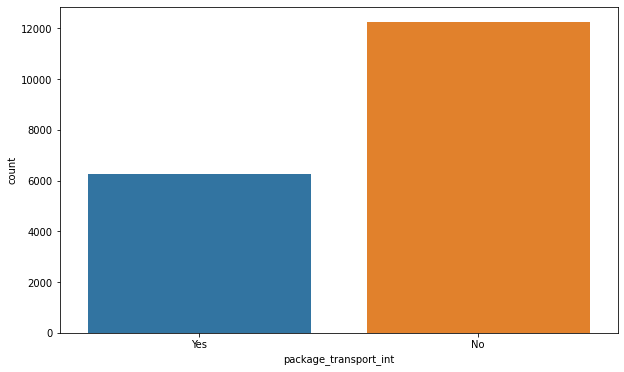

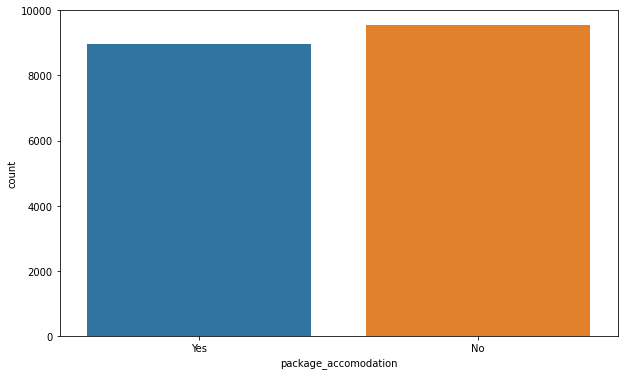

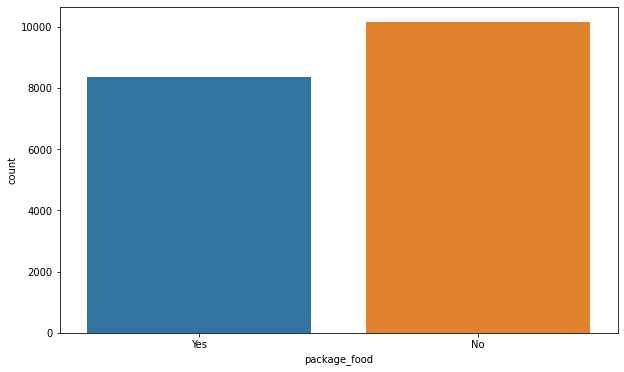

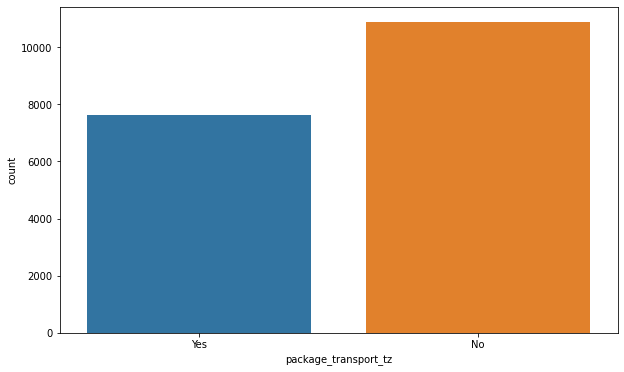

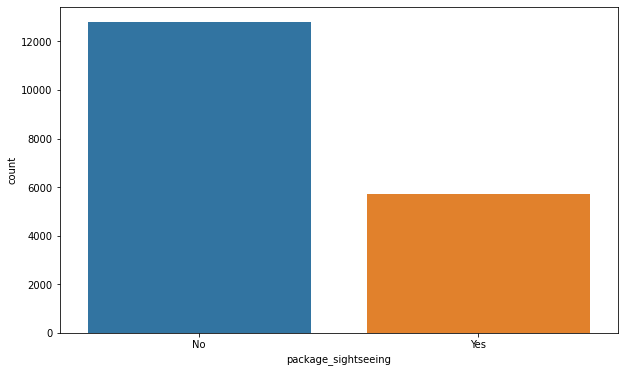

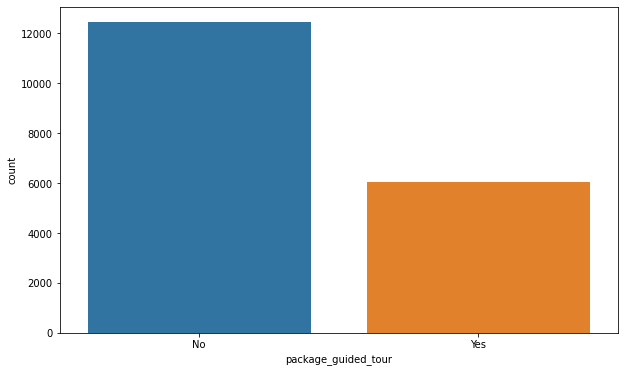

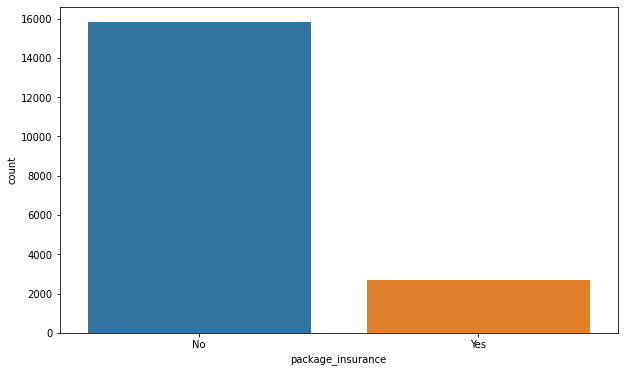

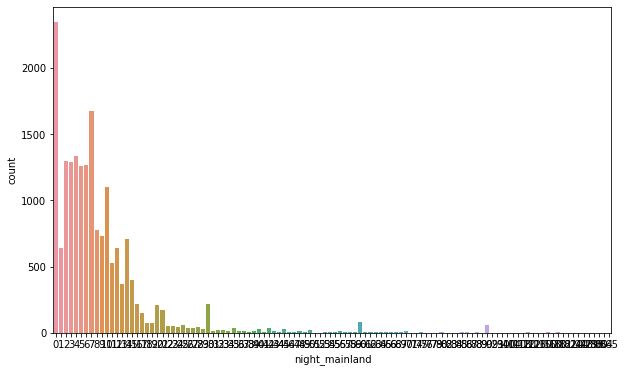

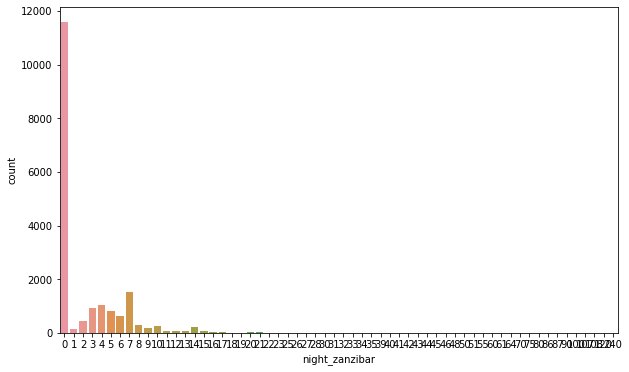

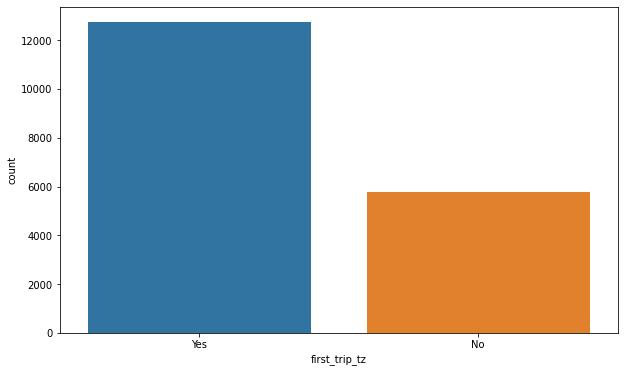

In [ ]:
for c in train.columns[1:-1]:
  plt.figure(figsize=(10, 6))
  sns.countplot(x = c, data = train)

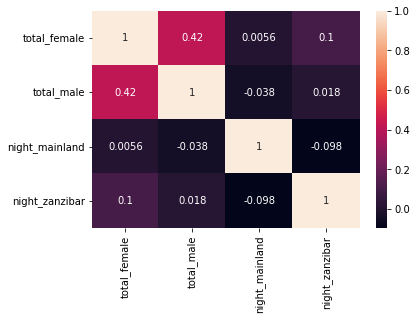

In [ ]:
# correlation between numerical variables
train.select_dtypes(['float64' , 'int64']).corr()
sns.heatmap(train.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

(array([11378.88138684,  6212.89267848,   758.77324324,  3127.46253976,
         3201.30189453,  1280.52665005,  8833.8467335 ,  4146.7340794 ,
         3580.92379327,  4064.49292984,  3917.09088025,  3728.81179596,
         3110.18784223,  3277.87975401,  1766.50756857,   694.9174336 ,
        28679.71852037]),
 array([0.00000000e+000, 0.00000000e+000, 9.57605205e-162, 0.00000000e+000,
        0.00000000e+000, 1.05703599e-274, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 6.16863031e-148,
        0.00000000e+000]))

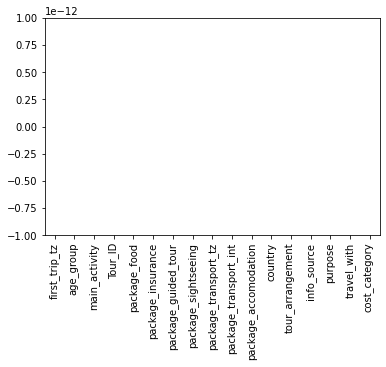

In [ ]:
# Quantitative categorical vs categorical analysis
'''
chi square test to test dependance between categorical features and target
conclusion : all categorical features seems to be useful for predictions
'''
from sklearn.feature_selection import chi2

label_enc = LabelEncoder()
categorical_cols = train.select_dtypes(include=['O']).columns.values
train_cp = train.copy()
for col in categorical_cols:
  train_cp[col] = label_enc.fit_transform(train_cp[col])

X = train_cp[categorical_cols]
y = train_cp['cost_category']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()
chi_scores

In [ ]:
# Quantitative numerical vs categorical analysis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


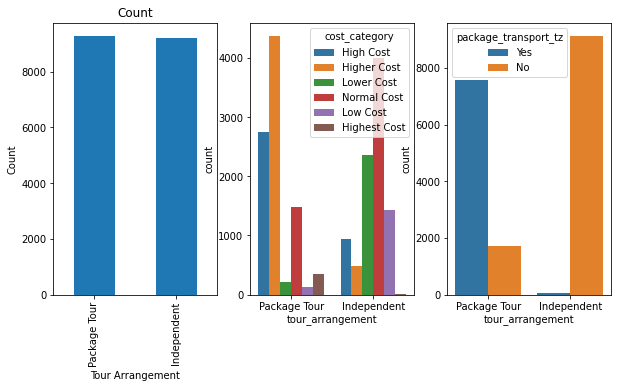

In [ ]:
# categorical vs categorical
# tour_arrangement vs cost_category
'''
insights:
- all of highest cost have a package tour
- tourists who have a package tour seem to higher cost than independents
- by observing package details, its seems some independents have any package offers, which is inconsistent. maybe error occurs when registred data. we should maybe drop these rows
'''
# Analysis of tour_arrangement features
f,ax = plt.subplots(1,3,figsize=(10,5))
train.tour_arrangement.value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Count")
ax[0].set_xlabel("Tour Arrangement")
ax[0].set_ylabel("Count")
sns.countplot(data=train, x=train.tour_arrangement, hue=train.cost_category,ax=ax[1])
#train[['tour_arrangement','package_transport_tz','cost_category']].groupby(['package_transport_tz']).plot.bar(ax=ax[2])
sns.countplot("tour_arrangement",hue="package_transport_tz",data=train,ax=ax[2])

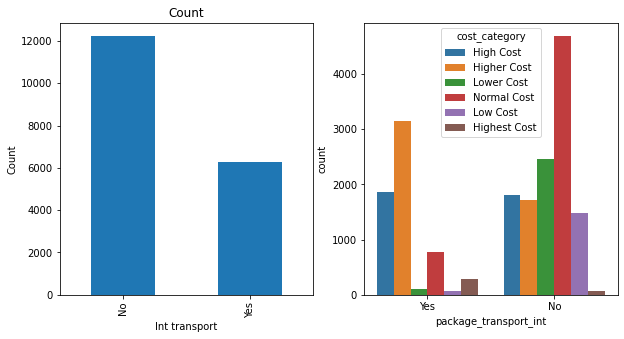

In [ ]:
# categorical vs categorical
# transport_int vs cost_category
'''
insights:
- all of highest cost have a package tour
- tourists who have a package tour seem to higher cost than independents
'''
# Analysis of tour_arrangement features
f,ax = plt.subplots(1,2,figsize=(10,5))
train.package_transport_int.value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Count")
ax[0].set_xlabel("Int transport")
ax[0].set_ylabel("Count")
sns.countplot(data=train, x=train.package_transport_int, hue=train.cost_category,ax=ax[1])
#train[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar(ax=ax[1,0])
#sns.countplot("Embarked",hue="Pclass",data=train,ax=ax[1,1])

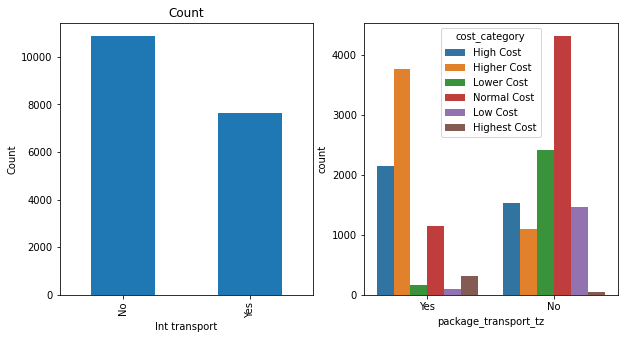

In [ ]:
# categorical vs categorical
# transport_int vs cost_category
'''
insights:
- all of highest cost have a package tour
- tourists who have a package tour seem to higher cost than independents
'''
# Analysis of features
f,ax = plt.subplots(1,2,figsize=(10,5))
train.package_transport_tz.value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Count")
ax[0].set_xlabel("Int transport")
ax[0].set_ylabel("Count")
sns.countplot(data=train, x=train.package_transport_tz, hue=train.cost_category,ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


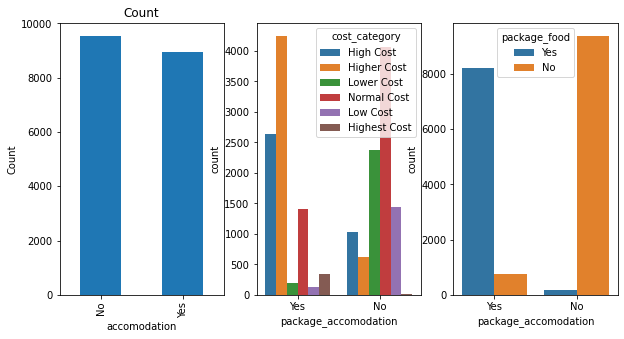

In [ ]:
# categorical vs categorical
# transport_int vs cost_category
'''
insights:
- all of highest cost have a package tour
- tourists who have a package tour seem to higher cost than independents
'''
# Analysis of features
f,ax = plt.subplots(1,3,figsize=(10,5))
train.package_accomodation.value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Count")
ax[0].set_xlabel("accomodation")
ax[0].set_ylabel("Count")
sns.countplot(data=train, x=train.package_accomodation, hue=train.cost_category,ax=ax[1])
sns.countplot("package_accomodation",hue="package_food",data=train,ax=ax[2])

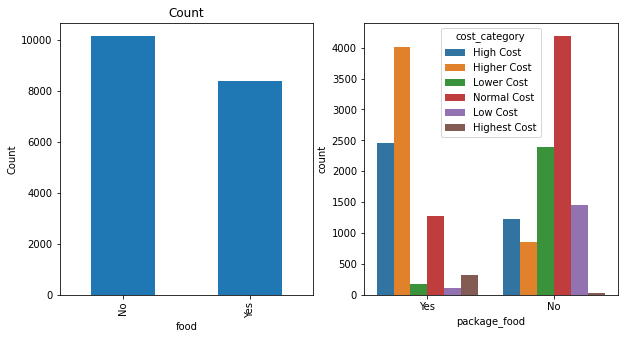

In [ ]:
# categorical vs categorical
# transport_int vs cost_category
'''
insights:
- all of highest cost have a package tour
- tourists who have a package tour seem to higher cost than independents
'''
# Analysis of features
f,ax = plt.subplots(1,2,figsize=(10,5))
train.package_food.value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Count")
ax[0].set_xlabel("food")
ax[0].set_ylabel("Count")
sns.countplot(data=train, x=train.package_food, hue=train.cost_category,ax=ax[1])

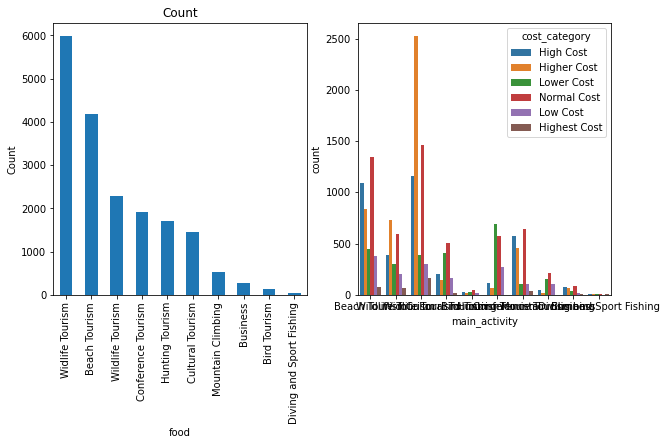

In [35]:
# categorical vs categorical
# travel_with vs cost_category
'''
insights:

'''
# Analysis of features
f,ax = plt.subplots(1,2,figsize=(10,5))
train.main_activity.value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Count")
ax[0].set_xlabel("food")
ax[0].set_ylabel("Count")
sns.countplot(data=train, x=train.main_activity, hue=train.cost_category,ax=ax[1])

In [ ]:
train.main_activity.unique()

array(['Beach Tourism', 'Wildlife Tourism', 'Widlife Tourism',
       'Cultural Tourism', 'Bird Tourism', 'Hunting Tourism',
       'Conference Tourism', 'Mountain Climbing', 'Business',
       'Diving and Sport Fishing'], dtype=object)

In [4]:
train.travel_with.unique()

array(['With Children', 'With Spouse', 'With Spouse and Children',
       'Alone', nan, 'With Other Friends/Relatives'], dtype=object)

In [ ]:
# categorical vs categorical
# tour_arrangement vs cost_category
'''
insights:
- all of highest cost have a package tour
- tourists who have a package tour seem to higher cost than independents
'''
sns.countplot(data=train, x=train.tour_arrangement, hue=train.cost_category)

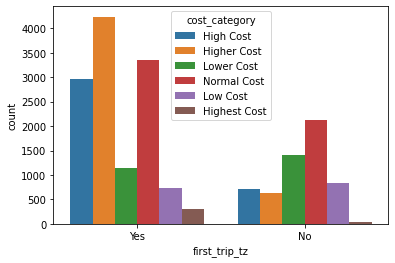

In [ ]:
# categorical vs categorical
# travel_with vs cost_category
sns.countplot(data=train, x=train.first_trip_tz, hue=train.cost_category)
#plt.ylim(0, 200)

In [ ]:
pd.crosstab(train.info_source, train.cost_category,margins=True)

cost_category,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost,All
info_source,,,,,,,
"Friends, relatives",807,656,43,800,1506,2265,6077
Inflight magazines,10,9,3,19,21,30,92
"Newspaper, magazines, brochures",256,295,12,122,167,449,1301
Others,193,181,8,173,271,542,1368
"Radio, TV, Web",285,257,12,94,124,451,1223
Tanzania Mission Abroad,32,17,0,35,36,77,197
Trade fair,20,20,5,39,84,75,243
"Travel agent, tour operator",2075,3430,276,284,358,1582,8005
All,3678,4865,359,1566,2567,5471,18506


In [ ]:
!pip install info_gain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Info Gain for categorical vs categorical analysis
from info_gain import info_gain
categorical_cols = train.select_dtypes(include=['O']).columns.values
for col in categorical_cols[1:-1]:
  ig  = info_gain.info_gain(train[col], train.cost_category)
  print(col, '          ', ig)

country            0.2386954167049149
age_group            0.048261265316989155
travel_with            0.13943412415900802
purpose            0.2008657825407465
main_activity            0.10091220924534872
info_source            0.11776360441514644
tour_arrangement            0.25529217881211536
package_transport_int            0.1604971699076686
package_accomodation            0.23940420777413413
package_food            0.21452903444590465
package_transport_tz            0.18904974901966598
package_sightseeing            0.1303640414553282
package_guided_tour            0.14163358985684166
package_insurance            0.059890775419941034
first_trip_tz            0.06202421468856445


In [24]:
# to check rows with null travel_with
'''
insights :
- all of rows with null travel_with have total_male/female == 1
- so we will replace travel_with by 'Alone' in this case
'''
x = np.nan
train.query("travel_with.isnull()", engine='python')

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
24,tour_idf0b1l18p,ZIMBABWE,45-64,NaN,0.0,1.0,Business,Wildlife Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,2,0,Yes,Lower Cost
81,tour_idej88i9yi,SPAIN,25-44,NaN,0.0,1.0,Other,Wildlife Tourism,Others,Independent,...,No,No,No,No,No,No,10,0,No,Normal Cost
94,tour_idl1dh1dh5,RWANDA,25-44,NaN,0.0,1.0,Visiting Friends and Relatives,Cultural Tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,1,0,No,Lower Cost
115,tour_id1qqc5bsu,NETHERLANDS,25-44,NaN,0.0,1.0,Leisure and Holidays,Cultural Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,60,0,Yes,Normal Cost
121,tour_idjgqgc0hk,CANADA,25-44,NaN,1.0,0.0,Volunteering,Cultural Tourism,Others,Independent,...,No,No,No,No,No,No,13,0,Yes,Lower Cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18455,tour_ido7d30nom,UNITED STATES OF AMERICA,18-24,NaN,1.0,0.0,Visiting Friends and Relatives,Wildlife Tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,22,0,Yes,Low Cost
18476,tour_iddco8mrmm,UNITED KINGDOM,25-44,NaN,0.0,1.0,Meetings and Conference,Wildlife Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,5,0,No,Higher Cost
18485,tour_id7y8xi15j,UGANDA,25-44,NaN,0.0,1.0,Meetings and Conference,Cultural Tourism,"Travel agent, tour operator",Independent,...,No,No,No,No,No,No,4,0,Yes,Normal Cost
18486,tour_idnkzpxk3k,NEW ZEALAND,45-64,NaN,1.0,0.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,15,6,Yes,Higher Cost


In [26]:
# to check rows with null total_male or female
'''
insights :
- we will replace total_female and male by 1
'''
x = np.nan
train.query("total_female.isnull()", engine='python')

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
7627,tour_idsgxazh59,FRANCE,25-44,With Other Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,9,5,Yes,Lower Cost
8388,tour_id1kmucs2v,ITALY,18-24,With Other Friends/Relatives,NaN,4.0,Volunteering,Wildlife Tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,15,0,Yes,High Cost


In [34]:
train.main_activity.unique()

array(['Beach Tourism', 'Wildlife Tourism', 'Widlife Tourism',
       'Cultural Tourism', 'Bird Tourism', 'Hunting Tourism',
       'Conference Tourism', 'Mountain Climbing', 'Business',
       'Diving and Sport Fishing'], dtype=object)

In [ ]:
train.groupby(by='cost_category').agg('mean')[['total_female', 'total_male', 'night_mainland', 'night_zanzibar']]

,total_female,total_male,night_mainland,night_zanzibar
cost_category,,,,
High Cost,1.037531,0.966558,9.113105,3.617455
Higher Cost,1.321686,1.202961,9.026516,3.310997
Highest Cost,2.278552,2.165266,7.699164,2.949861
Low Cost,0.569604,0.842912,8.454023,1.101533
Lower Cost,0.537023,0.895988,6.733541,0.431243
Normal Cost,0.729483,0.855549,10.684336,2.347103


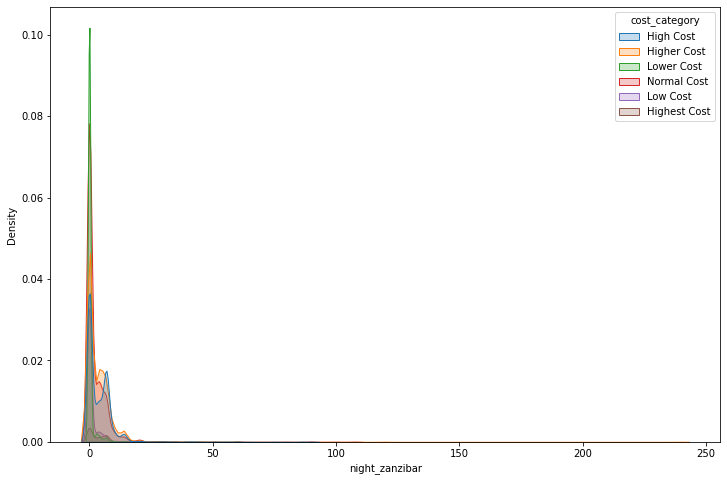

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=train, x='night_zanzibar', hue='cost_category', fill=True)

In [49]:
#!pip install pycountry-convert
import pycountry_convert as pc

country_code = pc.country_name_to_country_alpha2("UNITED ARAB EMIRATES", cn_name_format="upper")
print(country_code)
continent_name = pc.country_alpha2_to_continent_code(country_code)
print(continent_name)

AE
AS


In [122]:
# Feature Engineering

train_cp = train.copy()

# to map country to continent
def country_to_continent(df):
  df = df.replace('SWIZERLAND', 'SWITZERLAND')
  df = df.replace('MORROCO', 'MOROCCO')
  df = df.replace('UAE', 'UNITED ARAB EMIRATES')
  df = df.replace('KOREA', 'SOUTH KOREA')
  df = df.replace('DRC', 'DEMOCRATIC REPUBLIC OF THE CONGO')
  df = df.replace('MALT', 'MALTA')
  df = df.replace('COSTARICA', 'COSTA RICA')
  df = df.replace('COMORO', 'COMOROS')
  df = df.replace('SAUD ARABIA', 'SAUDI ARABIA')
  df = df.replace('PHILIPINES', 'PHILIPPINES')
  df = df.replace('SCOTLAND', 'UNITED KINGDOM')
  df = df.replace('UKRAIN', 'UKRAINE')
  df = df.replace('SOMALI', 'SOMALIA')
  df = df.replace('ECUADO', 'ECUADOR')
  df = df.replace('MONECASQUE', 'MONACO')
  df = df.replace('TRINIDAD TOBACCO', 'TRINIDAD AND TOBAGO')
  df = df.replace('BURGARIA', 'BULGARIA')
  df = df.replace('BOSNIA', 'BOSNIA AND HERZEGOVINA')
  df = df.replace('DJIBOUT', 'DJIBOUTI')
  df['continent'] = df.apply(lambda x: pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(x['country'], cn_name_format="upper")), axis = 1)
  return df

# to rebinning age_group
def binning_age_group(df, bins=3):
  # to 3 bins : -24, 25-44, 45+
  def bin3(age_group):
    if(age_group=='18-24' or age_group=='<18'):
      return '-24'
    if(age_group=='25-44'):
      return '25-44'
    if(age_group=='45-64' or age_group=='65+'):
      return '45+'

  # to 2 bins : -45, 45+
  def bin2(age_group):
    if(age_group=='18-24' or age_group=='<18' or age_group=='25-44'):
      return '-45'
    if(age_group=='45-64' or age_group=='65+'):
      return '45+'

  if(bins == 3):
    df['age_group'] = df.apply(lambda x: bin3(x['age_group']), axis = 1)
  if(bins == 2):
    df['age_group'] = df.apply(lambda x: bin2(x['age_group']), axis = 1)
  return df

# to fill na of some columns
def col_fillna(df):
  # fill travel_with na with 'Alone'
  df['travel_with'].fillna('Alone', inplace=True)
  # fill total_male and total_female na with 1
  df['total_male'].fillna(1, inplace=True)
  df['total_female'].fillna(1, inplace=True)
  # replace 'Widlife Tourism' by 'Wildlife Tourism' in main_activity
  df = df.replace('Widlife Tourism', 'Wildlife Tourism')
  df = df.replace('Yes', 1)
  df = df.replace('No', 0)
  return df

# drop all rows with tour_arrangement=='independent' and any_package=='yes'
def clean_tour_arrangment_package(df):
  # get concerning rows
  df_drop = df.query("tour_arrangement=='Independent' and (package_transport_int=='Yes' or package_transport_int=='Yes' or package_accomodation=='Yes' or package_food=='Yes' or package_transport_tz=='Yes' or package_sightseeing=='Yes' or package_guided_tour=='Yes' or package_insurance=='Yes')")
  # remove rows (its 142 at all concerning)
  df.drop(df_drop.index, inplace=True)
  return df

# add package_acc_food (ie. if the tour package include both accomadation and food )
def add_package_acc_food(df):
  def acc_food(accomodation, food):
    if(accomodation==1 and food==1):
      return 1
    else:
      return 0
  df['package_acc_food'] = df.apply(lambda x: acc_food(x['package_accomodation'], x['package_food']), axis = 1)
  return df

# add package_transport (ie. if the tour package include both international and Tanzania transport )
def add_package_transport(df):
  def transport(international, tz):
    if(international==1 and tz==1):
      return 1
    else:
      return 0
  df['package_transport'] = df.apply(lambda x: transport(x['package_transport_int'], x['package_transport_tz']), axis = 1)
  return df

# add package_sight_guided (ie. if the tour package include both sightseeing and guided_tour )
def add_package_sight_guided(df):
  def sight_guided(sight, guided):
    if(sight==1 and guided==1):
      return 1
    else:
      return 0
  df['package_sight_guided'] = df.apply(lambda x: sight_guided(x['package_sightseeing'], x['package_guided_tour']), axis = 1)
  return df

# to add total_persons
def add_total_persons(df):
  df['total_persons'] = df['total_male']+df['total_female']
  return df

def process_df(df):
  df = clean_tour_arrangment_package(df)
  df = country_to_continent(df)
  df = binning_age_group(df, bins=3)
  df = col_fillna(df)
  df = add_package_acc_food(df)
  df = add_package_transport(df)
  df = add_package_sight_guided(df)
  df = add_total_persons(df)

  return df

#df1 = country_to_continent(train_cp)
#df1.continent.unique()
#df1 = binning_age_group(train_cp, bins=2)
#df1.age_group.unique()
#df1 = col_fillna(train_cp)
#df1.main_activity.unique()
#df1 = clean_tour_arrangment_package(train_cp)
#len(df1.index)
df = train_cp
#df = df.replace('Yes', 1)
#df = df.replace('No', 0)
#df = add_package_sight_guided(df)
#df
df = process_df(df)
df

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category,continent,package_acc_food,package_transport,package_sight_guided,total_persons
0,tour_id1hffseyw,ITALY,45+,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,0,0,7,1,High Cost,EU,1,1,0,2.0
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,0,0,7,1,High Cost,EU,1,1,0,2.0
2,tour_id62vz7e71,UNITED STATES OF AMERICA,45+,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,0,6,6,1,Higher Cost,NA,1,1,1,2.0
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,0,3,0,0,Lower Cost,AF,0,0,0,4.0
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45+,Alone,0.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,1,7,0,1,Higher Cost,NA,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,tour_idmp5ciw50,KENYA,45+,Alone,0.0,1.0,Other,Hunting Tourism,Others,Independent,...,0,3,0,0,Lower Cost,AF,0,0,0,1.0
18502,tour_ideq0yncfs,KENYA,45+,Alone,1.0,0.0,Meetings and Conference,Wildlife Tourism,Others,Independent,...,0,2,0,0,Lower Cost,AF,0,0,0,1.0
18503,tour_idv7pz3vs8,UNITED STATES OF AMERICA,25-44,With Spouse and Children,2.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Independent,...,0,9,0,1,Higher Cost,NA,0,0,0,3.0
18504,tour_idy6ydo00w,UNITED STATES OF AMERICA,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Conference Tourism,"Radio, TV, Web",Package Tour,...,0,13,4,0,Higher Cost,NA,1,1,1,2.0


In [123]:
df.query("tour_arrangement=='Independent'").iloc[:,10:]

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category,continent,package_acc_food,package_transport,package_sight_guided,total_persons
3,0,0,0,0,0,0,0,3,0,0,Lower Cost,AF,0,0,0,4.0
6,0,0,0,0,0,0,0,7,0,1,Normal Cost,EU,0,0,0,2.0
7,0,0,0,0,0,0,0,4,0,1,Low Cost,AF,0,0,0,1.0
8,0,0,0,0,0,0,0,60,0,1,Normal Cost,EU,0,0,0,1.0
14,0,0,0,0,0,0,0,14,0,0,High Cost,EU,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18500,0,0,0,0,0,0,0,2,0,0,Low Cost,AF,0,0,0,1.0
18501,0,0,0,0,0,0,0,3,0,0,Lower Cost,AF,0,0,0,1.0
18502,0,0,0,0,0,0,0,2,0,0,Lower Cost,AF,0,0,0,1.0
18503,0,0,0,0,0,0,0,9,0,1,Higher Cost,NA,0,0,0,3.0


In [116]:
#!pip install category_encoders
import category_encoders as ce
cbe_encoder = ce.cat_boost.CatBoostEncoder()
df1 = df.copy()
df1['cost_category'] = df1['cost_category'].map(lambda x: 0 if x=='Lower Cost' else 1 if x=='Low Cost' else 2 if x=='Normal Cost' else 3 if x=='High Cost' else 4 if x=='Higher Cost' else 5)
target = df1[['cost_category']]
x = df1.drop('cost_category',axis=1)

# Fit encoder and transform the features
cbe_encoder.fit(x, target)
df_cbe = cbe_encoder.transform(x)
df_cbe

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,continent,package_acc_food,package_transport,package_sight_guided
0,2.420674,2.978734,2.864871,2.846792,0.0,2.0,1.364174,2.412754,1.742748,3.288987,...,0,0,0,0,7,1,2.768350,1,1,0
1,2.420674,2.422180,2.179313,3.185716,1.0,1.0,3.016623,2.826695,3.094607,3.288987,...,0,0,0,0,7,1,2.768350,1,1,0
2,2.420674,3.083042,2.864871,3.185716,1.0,1.0,3.016623,2.826695,3.094607,3.288987,...,1,1,0,6,6,1,3.052358,1,1,1
3,2.420674,0.523429,2.179313,3.364674,3.0,1.0,3.016623,2.412754,2.403121,1.544444,...,0,0,0,3,0,0,1.175747,0,0,0
4,2.420674,3.083042,2.864871,1.759338,0.0,1.0,3.016623,2.826695,3.094607,3.288987,...,0,1,1,7,0,1,3.052358,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,2.420674,1.133530,2.864871,1.759338,0.0,1.0,1.083855,1.179463,1.900965,1.544444,...,0,0,0,3,0,0,1.175747,0,0,0
18502,2.420674,1.133530,2.864871,1.759338,1.0,0.0,1.519001,2.826695,1.900965,1.544444,...,0,0,0,2,0,0,1.175747,0,0,0
18503,2.420674,3.083042,2.179313,3.364674,2.0,1.0,3.016623,2.826695,3.094607,1.544444,...,0,0,0,9,0,1,3.052358,0,0,0
18504,2.420674,3.083042,2.179313,3.185716,1.0,1.0,3.016623,2.663936,2.403121,3.288987,...,1,1,0,13,4,0,3.052358,1,1,1


In [102]:
df = train.copy()
df_drop = df.query("tour_arrangement=='Independent' and (package_transport_int=='Yes' or package_transport_int=='Yes' or package_accomodation=='Yes' or package_food=='Yes' or package_transport_tz=='Yes' or package_sightseeing=='Yes' or package_guided_tour=='Yes' or package_insurance=='Yes')")
df.drop(df_drop.index, inplace=True)
df = df.groupby(by=['package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance'])
df.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,tour_idoxu1aldw,CANADA,45-64,With Spouse,0.0,0.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,No,No,No,Yes,Yes,No,5,4,Yes,Higher Cost
17857,tour_idllal6sks,NORWAY,45-64,With Other Friends/Relatives,1.0,1.0,Meetings and Conference,Conference Tourism,"Travel agent, tour operator",Package Tour,...,No,No,No,Yes,No,No,3,0,Yes,Higher Cost
17880,tour_idlah49n90,UNITED STATES OF AMERICA,65+,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,No,Yes,Yes,No,Yes,6,0,No,Higher Cost
17944,tour_idufyr9ykx,CHINA,45-64,With Other Friends/Relatives,2.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,No,Yes,No,Yes,No,No,4,0,Yes,Higher Cost


In [89]:
train.columns.unique()

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category'],
      dtype='object')